# Homework 2 Question 5 

(Based on Question P5-24 from Fogler)
A microreactor similar to the one shown here from Klavs Jensen's group at MIT is used to produce phosgene in the gas phase.
$$CO + Cl_2 \rightarrow COCl_2$$
$$ A + B \rightarrow C $$


![Microreactor from doi:10.1002/aic.690470716](https://raw.githubusercontent.com/rwest/CHME4510/master/images/microreactor.png)
from Ajmera, S. K., Losey, M. W., Jensen, K. F. and Schmidt, M. A. (2001), Microfabricated packed-bed reactor for phosgene synthesis. AIChE J., 47: 1639–1647. doi:10.1002/aic.690470716

The microreactor is 20 mm long, 500 mm in diameter, and packed with catalyst particles 35 μm in diameter. The entering partial pressure of A is 231 kPa (2.29 atm), and the entering flow to each microreactor is equimolar. The molar flow rate of CO is $2\times10^{–5}$ mol/s and the volumetric flow is $2.83\times10^{–7}$ m<sup>3</sup>/s. The weight of catalyst in one microreactor: $W = 3.5\times10^{–6}$ kg. The reactor is kept isothermal at 120 ˚C. Because the catalyst is also slightly different than the one in Figure P5-24B, the rate law is different as well:

$$-r'_A􏰆= k_A C_A C_B$$

Additional information:
 * $\alpha = 3.55\times10^{5}$ /kg catalyst (based on properties of air and $\phi=0.4$)
 * $k = 0.004$ m<sup>6</sup>/(mol . s . kg catalyst) at 120 ˚C
 * $v_0 = 2.83\times10^{-7}$ m<sup>3</sup>/s
 * $\rho = 7$ kg/m<sup>3</sup>
 * $\mu = 1.94\times10^{-5}$ kg/(m.s)
 * $A_c = 1.96\times10^{-7}$ m<sup>2</sup>
 * $G = 10.1$ kg/(m<sup>2</sup>.s)


(a) Plot the molar flow rates $F_A$, $F_B$, and $F_C$, the conversion $X$, and pressure ratio $y$ along the length (i.e., catalyst weight, $W$) of the reactor.

(b) Calculate the number of microreactors in parallel needed to produce 10,000 kg/year phosgene.

(c) Repeat part (a) for the case when the catalyst weight remains the same but the particle diameter is cut in half. If possible, compare your answer with part (a) and describe what you find, noting anything unusual. [Hint: Recall Example E5-5 part (c).]

(d) How would your answers to part (a) change if the reaction were reversible with $K_C$ = 0.04 m<sup>3</sup>/mol? Describe what you find.  (Warning: the textbook says 0.4 dm<sup>3</sup>/mol which is 100 times smaller and doesn't work)

(e) What are the advantages and disadvantages of using an array of micro- reactors over using one conventional packed-bed reactor that provides the same yield and conversion?

(f) Write a question that involves critical thinking, and explain why it involves critical thinking. [See Preface, Tables P-1 and P-2.]

(g)	Apply one or more of the six ideas in Table P-3, page xviii to this problem.



## (a)
First prepare the kernel by importing the libraries we need

In [3]:
%matplotlib inline
from matplotlib import pyplot
import numpy
from scipy.integrate import odeint

Set the constant parameters in the global scope

In [30]:
epsilon = #####
F_A0 = #####
F_B0 = #####
v0 = #####
k = #####
alpha = #####

Our two differential equations we wish to solve simultaneously are (find these on your formula sheet)
$$\frac{\mathrm{d} X}{\mathrm{d} W} = \frac{-r'_A}{F_{A0}}$$
and
$$\frac{\mathrm{d} y}{\mathrm{d} W} = \frac{-\alpha (1+\epsilon X)}{2 y}$$

$
\newcommand{\yy}{\mathbf{y}}
\newcommand{\ff}{\mathbf{f}}
$

We package the two variables into a vector $\yy = [X,y]$ so that we have one ODE to integrate:
$$
\frac{\mathrm{d} \yy}{\mathrm{d}W} = \ff(\yy, W)
$$


In [31]:
def dvector_by_dW(vector, W):
    """
    Returns the derivative of the vector [X,y] with
    respect to W, where:
      X = conversion
      y = pressure ratio
      W = weight of catalyst (kg)
    """
    X, y = vector # unpack the variables from the vector
    
    v = #####
    F_A = #####
    F_B = #####
    F_C = #####
    
    C_A = #####
    C_B = #####
    C_C = #####
    
    r_A = #####
    
    dX_by_dW = #####
    dy_by_dW = #####
    
    return [dX_by_dW, dy_by_dW] # return packaged as a vector
    

Set up the steps you want to integrate over. In this case it's Weight of catalyst, not Time


In [4]:
final_W =
# type and execute `numpy.linspace?` to see how this works:
W_output = numpy.linspace(0, final_W, num=100)

Set up the initial conditions, as a vector of the two values

In [33]:
vector0 = [0., 1.] # Initial values for the dependent variables

Perform the integration, and extract the results

In [34]:
# type and execute `odeint?` to see how this works
vector_result = odeint(dvector_by_dW, vector0, W_output)
# extract columns by transposing matrix and splitting into two variables
X, y  = vector_result.T 

Now try plotting graphs

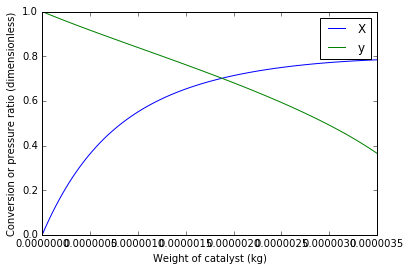

In [35]:
pyplot.plot(W_output, X, label='X')
pyplot.plot(W_output, y, label='y')
pyplot.legend()
pyplot.xlabel('Weight of catalyst (kg)')
pyplot.ylabel('Conversion or pressure ratio (dimensionless)')
pyplot.show()

OK, but the x axis labels are a bit of a mess. We'll fix that. Let's try the other plots:

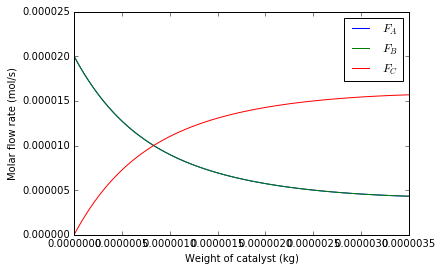

In [37]:
F_A = ##### (some functions of X and constant parameters)
F_B = #####
F_C = #####

pyplot.plot(W_output, F_A, label='$F_A$')
pyplot.plot(W_output, F_B, label='$F_B$')
pyplot.plot(W_output, F_C, label='$F_C$')
pyplot.legend()
pyplot.xlabel('Weight of catalyst (kg)')
pyplot.ylabel('Molar flow rate (mol/s)')

pyplot.show()

Having fiddled around with the formatting to your heart's content (check the matplotlib documentation online), we now make a re-usable function to do the analysis and plotting, so we don't have to repeat ourselves. (It would be better to replace the cells above with this function, once it's working well, but they have been left there to show you the progression).

In [5]:
# Here is mine. Feel free to improve it!
def analyze_and_plot(vector_result):
    """
    Analyzes and plots the results directly from the 
    array returned by the ODE solver.
    """
    X, y  = vector_result.T
    F_A = F_A0 * (1.-X)
    F_B = F_B0 - F_A0*X
    F_C = F_A0 * X

    axes = pyplot.axes() # this is so we can refer to it later
    
    pyplot.plot(W_output, F_A, label='$F_A$')
    pyplot.plot(W_output, F_B, label='$F_B$',
                linestyle='dashed', color='orange')
    pyplot.plot(W_output, F_C, label='$F_C$')
    pyplot.legend()
    pyplot.xlabel('Weight of catalyst (kg)')
    pyplot.ylabel('Molar flow rate (mol/s)')

    # This is to get the scientific notation on the axis labels
    # when they go below 1e-2 or above 1e3
    from matplotlib.ticker import ScalarFormatter
    fmt = ScalarFormatter()
    fmt.set_powerlimits((-2, 3))
    axes.xaxis.set_major_formatter(fmt)
    axes.yaxis.set_major_formatter(fmt)
    
    pyplot.show()

    axes = pyplot.axes() 
    pyplot.plot(W_output, X, label='X (conversion)')
    pyplot.plot(W_output, y, label='y (pressure ratio)')
    pyplot.legend()
    pyplot.xlabel('Weight of catalyst (kg)')
    pyplot.ylabel('Conversion or pressure ratio (dimensionless)')
    axes.xaxis.set_major_formatter(fmt) # reuse the formatter
    pyplot.show()
    
    # you can use the slicing trick X[-1] to get the last element of X
    # just like X[0] is the first element:
    final_conversion = X[-1]
    print("The outlet conversion is {0}".format(final_conversion))
    
    # initial pressure is 231 kPa of A + 231kPa of B
    final_pressure = (231.*2) * y[-1] #kPa
    print("The outlet pressure is {0:.3g} kPa ({1:.2f} atm)".format(
                final_pressure, final_pressure/101.325))
    
    return final_conversion

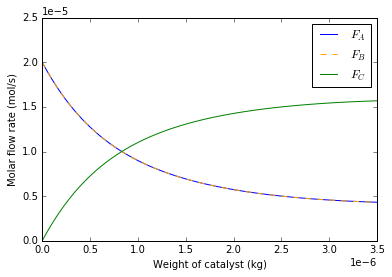

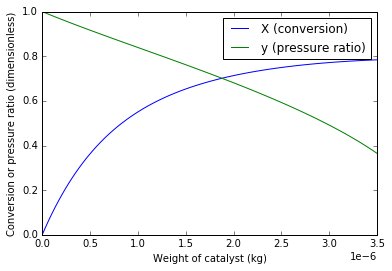

The outlet conversion is 0.783990419172
The outlet pressure is 169 kPa (1.66 atm)


In [10]:
X_final = analyze_and_plot(vector_result)

## (b)

First calculate the yield

In [11]:
molar_mass = ##### # g/mol of product
production_rate = ##### # g/s
annual_production = ##### # kg/yr
print("{0:.2f} kg/year in one microreactor".format(annual_production))

reactors = 10000. / annual_production
reactors = int(numpy.ceil(reactors)) # round up and make an integer
print("To make 10,000 kg/year need {0} microreactors".format(reactors))

48.95 kg/year in one microreactor
To make 10,000 kg/year need 205 microreactors


## (c)

Assuming laminar flow, 
$$\alpha \propto D_p^{-n}$$
where $n$ = (#####)
so if we halve $D_p$ then:


In [7]:
alpha = 3.55e5 * (0.5**-#####)
alpha

1420000.0

In [ ]:
vector_result = odeint(dvector_by_dW, vector0, W_output)
X_final = analyze_and_plot(vector_result)

What is happening?

#####

## (d)
The reaction is now reversible.
Now instead of 
$$ -r'_A = k C_A C_B $$
we must have
$$ -r'_A = k \left(C_A C_B - \frac{C_C}{K_C} \right)$$

Check the units make sense?
$K_C$ = 0.04 m<sup>3</sup>/mol.

Unfortunately we'll have to redefine our whole differential equation function. I suggest you copy and paste from above, and just change the `r_A = ` line. 

Don't forget to reset the $\alpha$ to that from part (a)!

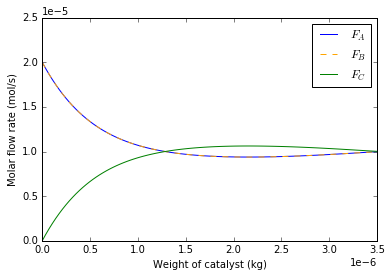

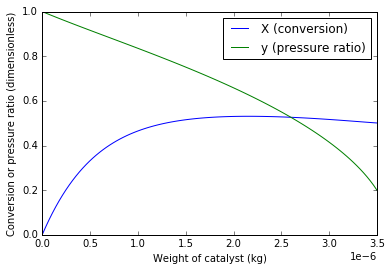

The outlet conversion is 0.500977247949
The outlet pressure is 92.2 kPa (0.91 atm)


In [15]:
alpha = #####  # reset this
K_C = #####    # m3/mol

def dvector_by_dW_reversible(vector, W):
    """
    For the reversible reaction case.
    Returns the derivative of the vector [X,y] with
    respect to W, where:
      X = conversion
      y = pressure ratio
      W = weight of catalyst (kg)
    """
    X, y = vector # unpack the variables from the vector
    
    #####
    
    return [dX_by_dW, dy_by_dW] # return packaged as a vector

vector_result = odeint(dvector_by_dW_reversible, vector0, W_output)
X_final = analyze_and_plot(vector_result)

What is happening?

#####

Complete the other parts in markdown cells below

Ensure that if you restart the kernel, clear all output, and run all cells from the top, the whole Notebook renders as you intend! 